In [151]:
#!pip install pandas sklearn matplotlib seaborn

In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
file_path = "C:/Users/afili/Desktop/Uni/Mestrado/AASE/apartments_for_rent_100k_final.csv"
data = pd.read_csv(file_path, sep=';')

In [197]:
# 2. Definir as colunas que deseja verificar por outliers
numerical_features = ['price', 'square_feet', 'bathrooms', 'bedrooms']

# 3. Função para remover outliers usando IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar dados dentro dos limites
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# 4. Aplicar a função para remover outliers
data_cleaned = remove_outliers(data, numerical_features)

# 5. Verificar o tamanho do dataset após remoção
print(f"Tamanho original do dataset: {data.shape}")
print(f"Tamanho após remoção de outliers: {data_cleaned.shape}")

Tamanho original do dataset: (99842, 53)
Tamanho após remoção de outliers: (92403, 53)


In [198]:
features = [
    'bathrooms', 'bedrooms', 'pets_allowed_transformed', 'cityname_transformed',
    'has_photo_transformed', 'square_feet', 'AC', 'Alarm', 'Basketball',
    'Cable or Satellite', 'Clubhouse', 'Dishwasher', 'Doorman', 'Elevator',
    'Fireplace', 'Garbage Disposal', 'Gated', 'Golf', 'Gym', 'Hot Tub',
    'Internet Access', 'Luxury', 'Parking', 'Patio/Deck', 'Playground',
    'Pool', 'Refrigerator', 'Storage', 'TV', 'Tennis', 'View', 'Washer Dryer',
    'Wood Floors', 'price'
]

X = data_cleaned[features]

In [199]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

In [217]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

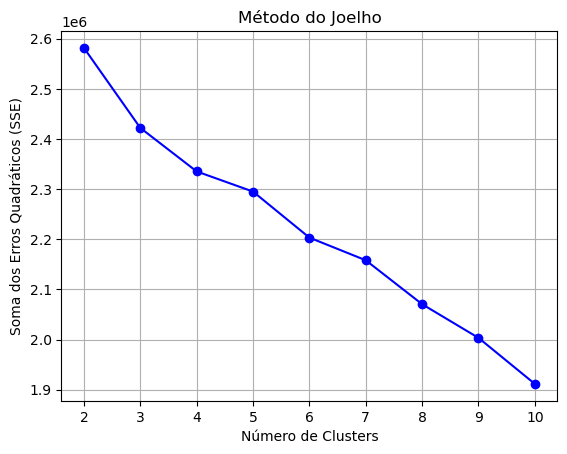

In [218]:
# 3. Método do cotovelo
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 4. Visualizar o método do cotovelo
plt.plot(range(2, 11), sse, marker='o', linestyle='-', color='blue')
plt.xticks(range(2, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.title("Método do Joelho")
plt.grid()
plt.show()

In [219]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
data_cleaned['cluster'] = kmeans.labels_

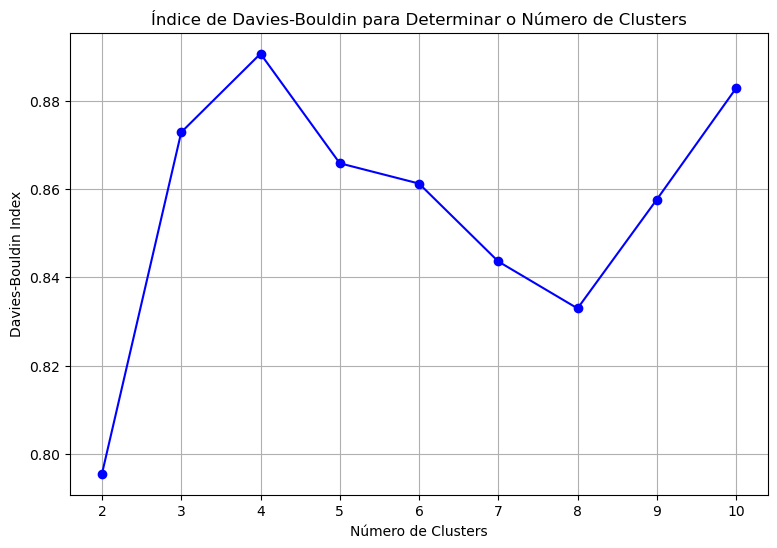

In [228]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin = []

# Testar diferentes números de clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, clusters)
    davies_bouldin.append(score)

# Plotar o gráfico
plt.figure(figsize=(9, 6))
plt.plot(range(2, 11), davies_bouldin, marker='o', color='b')
plt.title("Índice de Davies-Bouldin para Determinar o Número de Clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [221]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


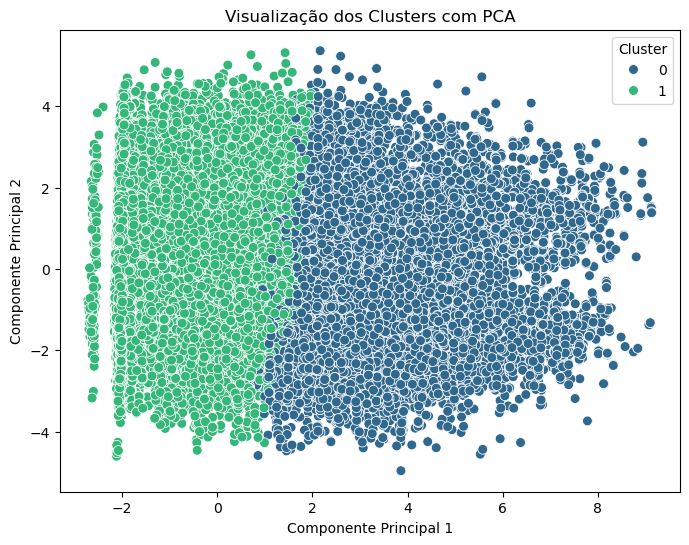

In [222]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_cleaned['cluster'], palette='viridis', s=50)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

In [223]:
from sklearn.metrics import silhouette_score

# Calcular o coeficiente de silhueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silhueta: {silhouette_avg:.3f}")

Coeficiente de Silhueta: -0.003


In [224]:
from sklearn.metrics import davies_bouldin_score

# Calcular o índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Índice de Davies-Bouldin: {davies_bouldin:.3f}")


Índice de Davies-Bouldin: 9.741


In [225]:
# SSE já está armazenado na variável `sse`
print(f"Inertia (SSE): {sse[n_clusters-2]:.3f}")  # Valor para o número de clusters escolhido

Inertia (SSE): 2422102.095


In [226]:
numeric_features = data_cleaned[features].select_dtypes(include=['number']).columns
cluster_summary = data_cleaned.groupby('cluster')[numeric_features].mean()
print("Resumo das Características por Cluster:")
print(cluster_summary)



Resumo das Características por Cluster:
         bathrooms  bedrooms  square_feet        AC     Alarm  Basketball  \
cluster                                                                     
0         1.400177  1.647381   893.645851  0.582637  0.017245    0.124191   
1         1.395754  1.651559   907.919775  0.065904  0.000491    0.025062   

         Cable or Satellite  Clubhouse  Dishwasher   Doorman  ...  Playground  \
cluster                                                       ...               
0                  0.525368   0.511418    0.705533  0.003178  ...    0.348323   
1                  0.040285   0.129898    0.046398  0.001193  ...    0.069099   

             Pool  Refrigerator   Storage        TV    Tennis      View  \
cluster                                                                   
0        0.725427      0.603061  0.429959  0.094350  0.192878  0.033196   
1        0.388262      0.048599  0.176747  0.034928  0.064286  0.017795   

         Washer Dryer  Wo

Distribuição de Clusters por Cidade:
cluster                   0      1
cityname_transformed              
Arlington               322   1185
Atlanta                 215   1277
Charlotte               207    893
Dallas                  423   2414
Denver                  363   2363
Las Vegas               458   1378
Los Angeles             401   1437
Other                 15062  67057


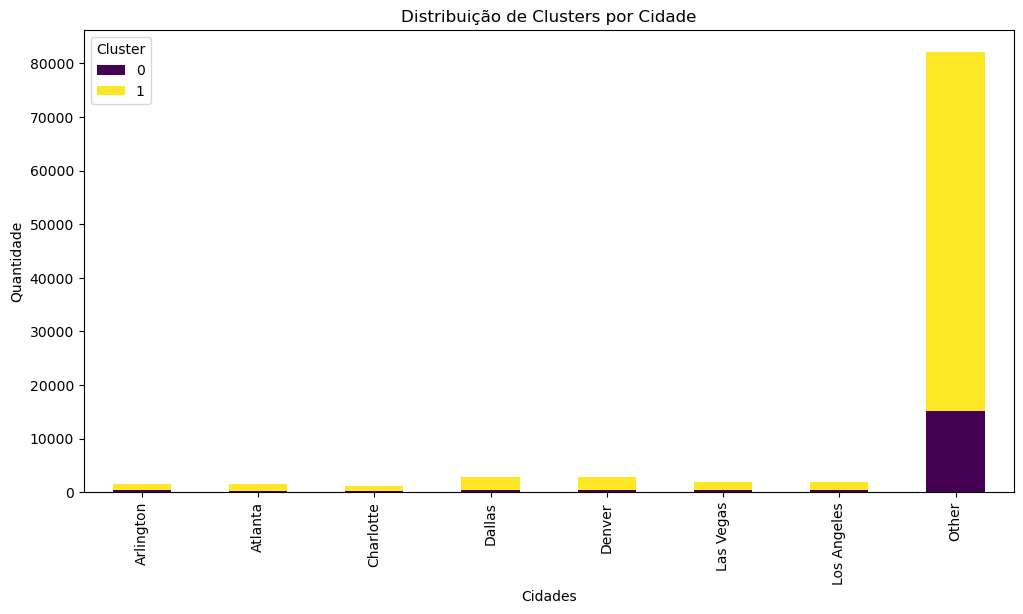

In [167]:
# Contagem de clusters por cidade
cluster_city_distribution = data_cleaned.groupby(['cityname_transformed', 'cluster']).size().unstack()
print("Distribuição de Clusters por Cidade:")
print(cluster_city_distribution)

# Visualizar a distribuição dos clusters por cidade
cluster_city_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribuição de Clusters por Cidade")
plt.xlabel("Cidades")
plt.ylabel("Quantidade")
plt.legend(title="Cluster")
plt.show()


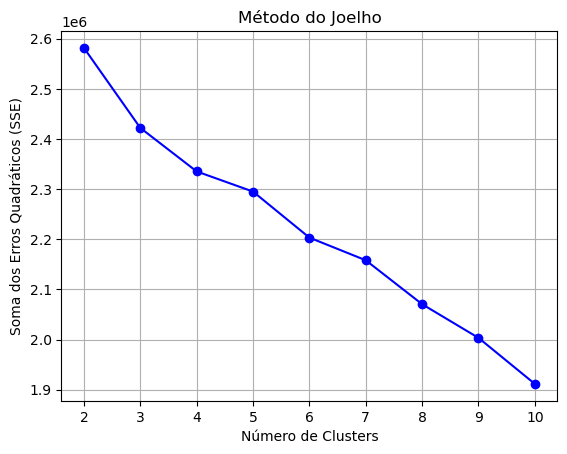

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# 1. Transformar variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# 2. Escalonar as variáveis para o KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Método do cotovelo
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 4. Visualizar o método do cotovelo
plt.plot(range(2, 11), sse, marker='o', linestyle='-', color='blue')
plt.xticks(range(2, 11))
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.title("Método do Joelho")
plt.grid()
plt.show()



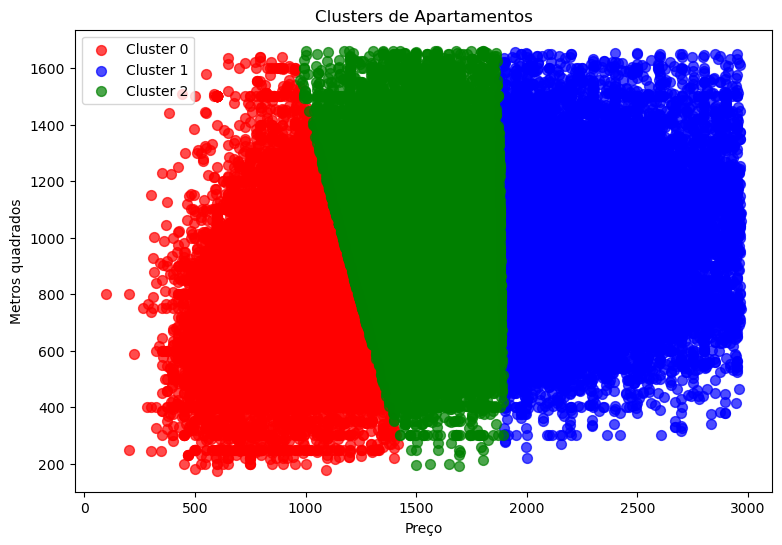

In [213]:
# 6. Clustering com o número escolhido de clusters
n_clusters = 3  # Ajuste conforme o método do cotovelo
kmeans = KMeans(n_clusters=n_clusters, random_state=12345)
clusters = kmeans.fit_predict(X)

# 7. Adicionar os clusters ao DataFrame
data_cleaned["cluster"] = clusters

# 8. Visualizar os clusters
COLORS = ['red', 'blue', 'green']  # Ajuste as cores conforme necessário

plt.figure(figsize=(9, 6))
for cluster in range(n_clusters):
    Xcluster = data_cleaned[data_cleaned["cluster"] == cluster]
    plt.scatter(
        Xcluster["price"],
        Xcluster["square_feet"],
        c=COLORS[cluster],
        label=f"Cluster {cluster}",
        s=50, alpha=0.7
    )

plt.xlabel("Preço")
plt.ylabel("Metros quadrados")
plt.legend()
plt.title("Clusters de Apartamentos")
plt.show()
plt.close()

In [214]:
from sklearn.metrics import silhouette_score

# Calcular o coeficiente de silhueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silhueta: {silhouette_avg:.3f}")


Coeficiente de Silhueta: 0.023


In [215]:
from sklearn.metrics import davies_bouldin_score

# Calcular o índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Índice de Davies-Bouldin: {davies_bouldin:.3f}")


Índice de Davies-Bouldin: 6.068


In [216]:
# SSE já está armazenado na variável `sse`
print(f"Inertia (SSE): {sse[n_clusters-2]:.3f}")  # Valor para o número de clusters escolhido


Inertia (SSE): 2422102.095
